# Chicago Taxicab Data Analysis

In this notebook I analyzed the [Chicago Taxi and Transportation Network Provider Data](https://data.cityofchicago.org/Transportation/Transportation-Network-Providers-Trips/m6dm-c72p). This dataset collected various sets of information on each individual taxi trips including pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, fare amount, tolls amount, rate types, payment types, and driver-reported passenger counts since  2014.
Since our aim is to predict the wait times in the taxi queues at O'Hare International Airport, I only analyzed the part of the data related to the Pickup Community Area 76 indicationg the O'Hare International Airport area.

In [2]:
import os
import pandas as pd
import numpy as np
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import cm
import folium
from folium import plugins
from folium.plugins import HeatMap
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Taxi_Trips.csv')

In [4]:
df.head()

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,5b204f24d3222a75cef1d411d751e9d1421ab4fd,f4ce4336448c7e8bdea302ffa4bf5d49520fbbdb941875...,12/22/2019 03:30:00 PM,12/22/2019 04:00:00 PM,1103.0,1.50,NaN,NaN,NaN,NaN,...,0.0,9.50,Cash,Medallion Leasin,NaN,NaN,NaN,NaN,NaN,NaN
1,59d801f7f7ffa4c1b7197e3e95a9ada17700197e,e9c94763d117bbbc3f0b00ec1232894582c63c86cdb181...,12/29/2019 10:15:00 AM,12/29/2019 10:45:00 AM,1097.0,5.38,NaN,NaN,NaN,NaN,...,0.0,17.00,Cash,Chicago Carriage Cab Corp,NaN,NaN,NaN,NaN,NaN,NaN
2,5b19cc46860e4805bff1d31935463cab8a2c4fae,a4b608e480d78cdf6a1bf59575fd3290f346d0f06d0663...,12/06/2019 05:30:00 PM,12/06/2019 05:45:00 PM,780.0,0.10,1.703184e+10,1.703184e+10,32.0,33.0,...,1.5,15.40,Credit Card,Taxi Affiliation Services,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),41.849247,-87.624135,POINT (-87.6241352979 41.8492467545)
3,59f6687657953e75a6258cbcbb7a8c9dd2aaecca,f7b3881bae139702c0198535ff8fd725cf0f3f95872204...,12/20/2019 10:00:00 AM,12/20/2019 10:15:00 AM,900.0,0.20,NaN,NaN,35.0,8.0,...,0.0,16.75,Credit Card,Blue Ribbon Taxi Association Inc.,41.835118,-87.618678,POINT (-87.6186777673 41.8351179863),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
4,5a5786a75ac2e2564749e6345eaa6075ac3b81ae,6d53848553e422a75bf3ff34e5a34ee2ee25494b85b320...,12/16/2019 05:00:00 PM,12/16/2019 05:15:00 PM,327.0,0.54,1.703184e+10,1.703184e+10,32.0,32.0,...,1.0,8.75,Credit Card,Chicago Carriage Cab Corp,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),41.880994,-87.632746,POINT (-87.6327464887 41.8809944707)


# Data Cleaning

In [5]:
df=df.rename(columns={"Trip Start Timestamp": "Trip_Start_Timestamp","Pickup Community Area": "Pickup_Community_Area","Pickup Centroid Latitude": "Pickup_Centroid_Latitude", "Pickup Centroid Longitude": "Pickup_Centroid_Longitude", "Dropoff Centroid Latitude": "Dropoff_Centroid_Latitude", "Dropoff Centroid Longitude": "Dropoff_Centroid_Longitude"})
sub_sec=df[['Pickup_Centroid_Longitude','Dropoff_Centroid_Longitude','Pickup_Centroid_Latitude','Dropoff_Centroid_Latitude']]
sub_sec.dropna(inplace= True)

# Heatmap of pickups in Chicago

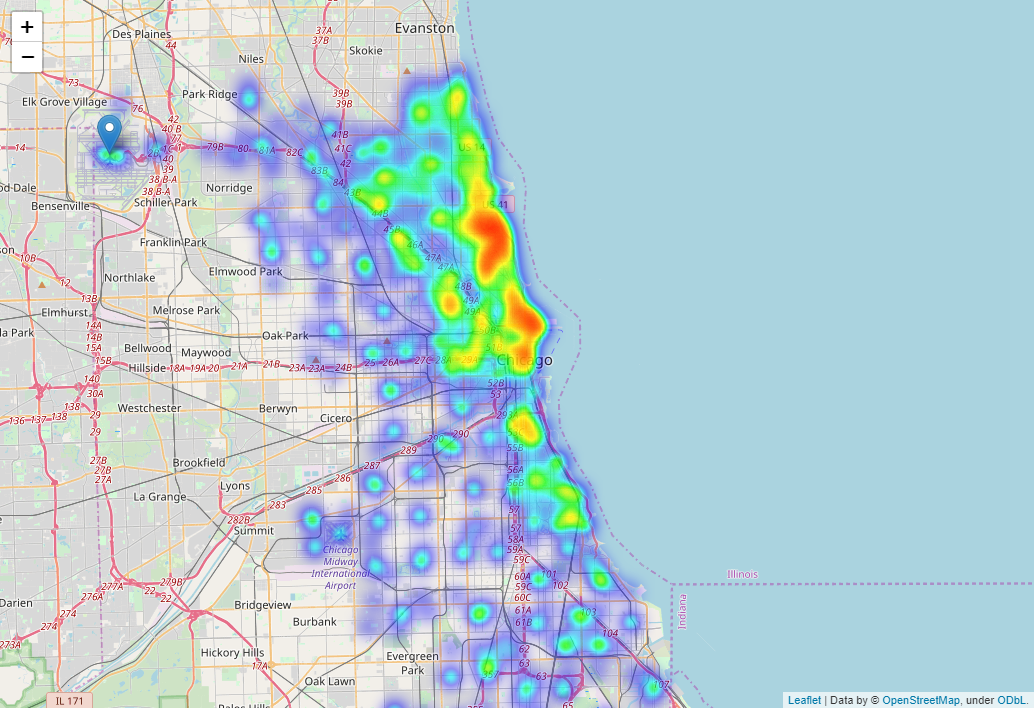

In [6]:
map = folium.Map(location=[41.8781, -87.6298],zoom_start =11)
heat_data = [[row['Pickup_Centroid_Latitude'],row['Pickup_Centroid_Longitude'],] for index, row in sub_sec.iterrows()]
HeatMap(heat_data, radius = 10).add_to(map)
folium.Marker([41.98, -87.91],popup = "O'Hare International Airport").add_to(map)
map.save('C:\\Users\\user\\Desktop\\map1.html')
import selenium.webdriver
driver = selenium.webdriver.Chrome()
driver.get('C:\\Users\\user\\Desktop\\map1.html')
driver.save_screenshot('pickups_heatmap.png')
driver.quit()
from IPython.display import Image
Image('pickups_heatmap.png')

#### Observation:

This mainly shows that downtown areas are having highest taxi pickup points. Also, the O'Hare International Airport in the north-west of the city is one of the high taxi pickup locations in the north-west chicago area.

# Total number of taxi pickups at each hour of the day

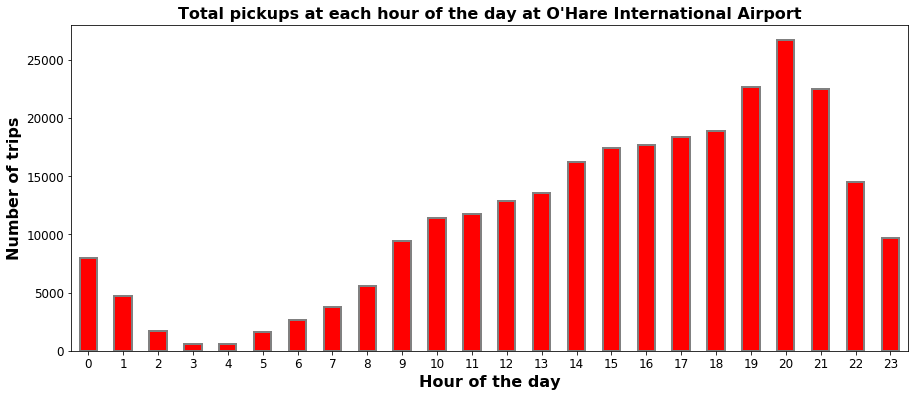

In [7]:
Pickup_Community_76=df.loc[df['Pickup_Community_Area'] == 76]
Pickup_Community_76['Trip_Start_Timestamp'] = pd.to_datetime(Pickup_Community_76.Trip_Start_Timestamp)
Pickup_Community_76['pickup_hour'] = Pickup_Community_76['Trip_Start_Timestamp'].dt.hour
plt.figure(figsize=(15, 6)) 
Pickup_Community_76.pickup_hour.value_counts().sort_index().plot(kind='bar',color=["red"],edgecolor=["gray"] ,align='center',width=0.5,linewidth=2)
plt.xlabel("Hour of the day",fontsize=16, fontweight='bold')
plt.xticks(rotation='horizontal')
plt.ylabel("Number of trips",fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Total pickups at each hour of the day at O'Hare International Airport",fontsize=16, fontweight='bold');

#### Observation:

This shows that the highest number of taxi pickups at O'Hare International Airport occurs at 8 p.m. This can be explined based the plot of total number of flight arrivals at each hour of th day provided in the Chicago_ORD_Flight_Arrival
 notebook, which shows that the highest number of flight arrivals ocuurs at 7 p.m.  